## Programmatic Data Wrangling

In [5]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The Brief:

Your task is to freely explore the data & draw insights from it. However, the following outcomes are expected:

* 3 Python visualisations showcasing insights drawn from the data
* 2 keypoints drawn from the data - explicitly stated in Markdown format and explained by your code & findings. What did you find most interesting? Or most surprising? Why is that?
* Select 2 movies on which to provide a more in-depth single observation analysis. Why have you selected these two? What's interesting about them? How do they compare to similar movies?



In [6]:
#Import the data:
df = pd.read_csv("TMDB_movies.csv")

In [7]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


The first thing I notice is that lots of the columns seem to be in json format, making me think this data was webscraped. I also see that there are some columns which would be good to categorise such as original_language and status.

In [8]:
df.describe(include="all")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
count,4.803000e+03,4803,1712,4803.000000,4803,4803,4803,4800,4803.000000,4803,4803,4802,4.803000e+03,4801.000000,4803,4803,3959,4803,4803.000000,4803.000000
unique,NaN,1175,1691,NaN,4222,37,4801,4800,NaN,3697,469,3280,NaN,NaN,544,3,3944,4800,NaN,NaN
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,NaN,[],en,Out of the Blue,"In the 22nd century, a paraplegic Marine is di...",NaN,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,NaN,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host,NaN,NaN
freq,NaN,370,4,NaN,412,4505,2,1,NaN,351,2977,10,NaN,NaN,3171,4795,3,2,NaN,NaN
mean,2.904504e+07,NaN,NaN,57165.484281,NaN,NaN,NaN,NaN,21.492301,NaN,NaN,NaN,8.226064e+07,106.875859,NaN,NaN,NaN,NaN,6.092172,690.217989
std,4.072239e+07,NaN,NaN,88694.614033,NaN,NaN,NaN,NaN,31.816650,NaN,NaN,NaN,1.628571e+08,22.611935,NaN,NaN,NaN,NaN,1.194612,1234.585891
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,7.900000e+05,NaN,NaN,9014.500000,NaN,NaN,NaN,NaN,4.668070,NaN,NaN,NaN,0.000000e+00,94.000000,NaN,NaN,NaN,NaN,5.600000,54.000000
50%,1.500000e+07,NaN,NaN,14629.000000,NaN,NaN,NaN,NaN,12.921594,NaN,NaN,NaN,1.917000e+07,103.000000,NaN,NaN,NaN,NaN,6.200000,235.000000
75%,4.000000e+07,NaN,NaN,58610.500000,NaN,NaN,NaN,NaN,28.313505,NaN,NaN,NaN,9.291719e+07,118.000000,NaN,NaN,NaN,NaN,6.800000,737.000000


In this data set there is a large mix of numerical and string data. In order to simplify the string data slightly, it may be worth turning some of the data into categories where possible.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

* 4803 entries in total.
* Most of the columns have zero nulls.
* The homepage column has over half of its data as nulls.
* The tagline column also has a significant amount of nulls (~20%)
* A few other columns have minor nulls including overview, release_date, runtime




This data seems to be uniquely identifiable by the id column, however to humans we know films by name. So I checked the uniquenss of both id and title.

In [ ]:
len(np.unique(df["id"]))

4803

In [ ]:
len(np.unique(df["title"]))

4800

We can see that the id column is a unique identifier with each row having a different value.

Title is slightly different with having 3 rows with a duplicated title.

In [ ]:
df.title.value_counts()

The Host                 2
Batman                   2
Out of the Blue          2
Avatar                   1
The Girl on the Train    1
                        ..
Step Up 3D               1
Secondhand Lions         1
The Age of Adaline       1
Drag Me to Hell          1
My Date with Drew        1
Name: title, Length: 4800, dtype: int64

We can see that The Host, Batman, and Out of the Blue are repeated twice.

In [ ]:
df[df["title"]=="Batman"]
df[df["title"]=="The Host"]
df[df["title"]=="Out of the Blue"]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3647,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,39269,"[{""id"": 4470, ""name"": ""punk""}, {""id"": 10183, ""...",en,Out of the Blue,Dennis Hopper is a hard-drinking truck driver ...,0.679351,"[{""name"": ""Robson Street"", ""id"": 71953}]","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",1980-05-01,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A harrowing drama from the director of Easy Rider,Out of the Blue,6.5,17
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The true story of a small town massacre,Out of the Blue,5.9,18


However after checking their data we can see that these are different films with the same name.

There is a date column at the moment, that is in a string format: this can simply be changed to a date time.

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])

At the moment the genres are stuck in a dictionary form along with their genre id. I think it would be easier to explore the genre data if it had a column of its own.

In [ ]:
# Create a genres map to store id/ genre:
# Since I am not sure what pandas features would be able to do this I will use python loop.
# I can use a loop as I know the data set isnt too big, and I can reduce the size further by only using the unique values from "genres"
print(f"Full column: {len(df['genres'])}")
print(f"Reduced set: {len(df['genres'].unique())}")

Full column: 4803
Reduced set: 1175


The id column can be moved to be the actual id of the dataframe just to clear up the data a bit more since that information isnt that useful in the table.

In [ ]:
df.set_index('id', inplace=True)

Since the genres columns appears to be in json form, we can import and use the json package to make the extraction much easier.

In [ ]:
import json

In [ ]:
## AN EXAMPLE

# we have the genres value from the first row
row1 = df["genres"].iloc[3647]
print(row1)
print(type(row1))

[{"id": 18, "name": "Drama"}]
<class 'str'>


This is in string form and therefore to unpack it we'd have to try to use splitting and other str functions which would be very difficult.

Instead can use the json package. Where for json -> python object we use "loads"

In [ ]:
new_row1 = json.loads(df["genres"].iloc[3647])
print(new_row1)
print(type(new_row1))

[{'id': 18, 'name': 'Drama'}]
<class 'list'>


Now we want to fill up the genre map with unique key,value pairs:


In [ ]:
## I would much rather use a pd way of doing this to speed it up but don't want to waste time exploring for it.

# Loop function (only 1000 rows)

all_genre = [] # a list to store all the genre dicts

for genre_json in df["genres"].unique():
  genre_list = json.loads(genre_json)

  for genre_dict in genre_list:

    if genre_dict not in all_genre:
      all_genre.append(genre_dict)


In [ ]:
all_genre

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 80, 'name': 'Crime'},
 {'id': 18, 'name': 'Drama'},
 {'id': 53, 'name': 'Thriller'},
 {'id': 16, 'name': 'Animation'},
 {'id': 10751, 'name': 'Family'},
 {'id': 37, 'name': 'Western'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10749, 'name': 'Romance'},
 {'id': 27, 'name': 'Horror'},
 {'id': 9648, 'name': 'Mystery'},
 {'id': 36, 'name': 'History'},
 {'id': 10752, 'name': 'War'},
 {'id': 10402, 'name': 'Music'},
 {'id': 99, 'name': 'Documentary'},
 {'id': 10769, 'name': 'Foreign'},
 {'id': 10770, 'name': 'TV Movie'}]

In [ ]:
len((all_genre))

20

There are 20 distrint genres in our dataset, here we have grouped them into a single list and now will create new columns on the dataset.

In [ ]:
#Now we can turn it into a dictionary to use as an idenfitier later on
genre_map = {dic['id']: dic['name'] for dic in all_genre}

In [ ]:
genre_map

{28: 'Action',
 12: 'Adventure',
 14: 'Fantasy',
 878: 'Science Fiction',
 80: 'Crime',
 18: 'Drama',
 53: 'Thriller',
 16: 'Animation',
 10751: 'Family',
 37: 'Western',
 35: 'Comedy',
 10749: 'Romance',
 27: 'Horror',
 9648: 'Mystery',
 36: 'History',
 10752: 'War',
 10402: 'Music',
 99: 'Documentary',
 10769: 'Foreign',
 10770: 'TV Movie'}

In order to create a new data column, we will want to use the apply method, for this we need to make a function.

In [ ]:
def json_to_genre(json_text, flip = True): #the input is the row value of the column
  to_list = json.loads(json_text)
  genres_c = 0
  genres = ""
  if flip == True:
    for dic in to_list:
      id, genre = dic.values()
      if genres_c == 0:
        genres = genres + str(genre)
        genres_c += 1
      else:
        genres = genres + ", " + str(genre)

  if flip == False: # flipped round id,genre
    for dic in to_list:
      genre, id = dic.values()
      if genres_c == 0:
        genres = genres + str(genre)
        genres_c += 1
      else:
        genres = genres + ", " + str(genre)


  return genres

In [ ]:
df.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
19995,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
285,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


Now we are going to replace our genres column

In [ ]:
df["genres"] = df["genres"].apply(json_to_genre)

In [ ]:
df.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
19995,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
285,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


There we go, slightly more readable.


We can do the same with keywords, however there are more unique values so will take longer

In [ ]:
all_keywords = [] # a list to store all the genre dicts

for keyword_json in df["keywords"].unique():
  keyword_list = json.loads(keyword_json)

  for keyword_dict in keyword_list:

    if keyword_dict not in all_keywords:
      all_keywords.append(keyword_dict)


In [ ]:
len(all_keywords)

9813

There are 9813 different key words.

In [ ]:
df["keywords"] = df["keywords"].apply(json_to_genre)

In [ ]:
df.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
19995,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
285,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


And also for production companies/ countries and languages

In [ ]:
all_companies = [] # a list to store all the genre dicts

for companies_json in df["production_companies"].unique():
  companies_list = json.loads(companies_json)

  for companies_dict in companies_list:

    if companies_dict not in all_companies:
      all_companies.append(companies_dict)

In [ ]:
len(all_companies)

5047

In [ ]:
df["production_companies"] = df["production_companies"].apply(json_to_genre,flip=False)

In [ ]:
df.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
19995,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
285,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [ ]:
all_countries = [] # a list to store all the genre dicts

for countries_json in df["production_countries"].unique():
  countries_list = json.loads(countries_json)

  for countries_dict in countries_list:

    if countries_dict not in all_countries:
      all_countries.append(countries_dict)

In [ ]:
len(all_countries)

88

In [ ]:
df["production_countries"] = df["production_countries"].apply(json_to_genre,flip=False)

In [ ]:
df.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
19995,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","US, GB",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
285,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",US,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [ ]:
all_lang = [] # a list to store all the genre dicts

for lang_json in df["spoken_languages"].unique():
  lang_list = json.loads(lang_json)

  for lang_dict in lang_list:

    if lang_dict not in all_lang:
      all_lang.append(lang_dict)

In [ ]:
len(all_lang)

87

In [ ]:
df["spoken_languages"] = df["spoken_languages"].apply(json_to_genre)

In [ ]:
df.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
19995,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","US, GB",2009-12-10,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800
285,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",US,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


Now we have a relatively more simple dataframe to read.

And can start to do some exploratory data analysis.

### EDA

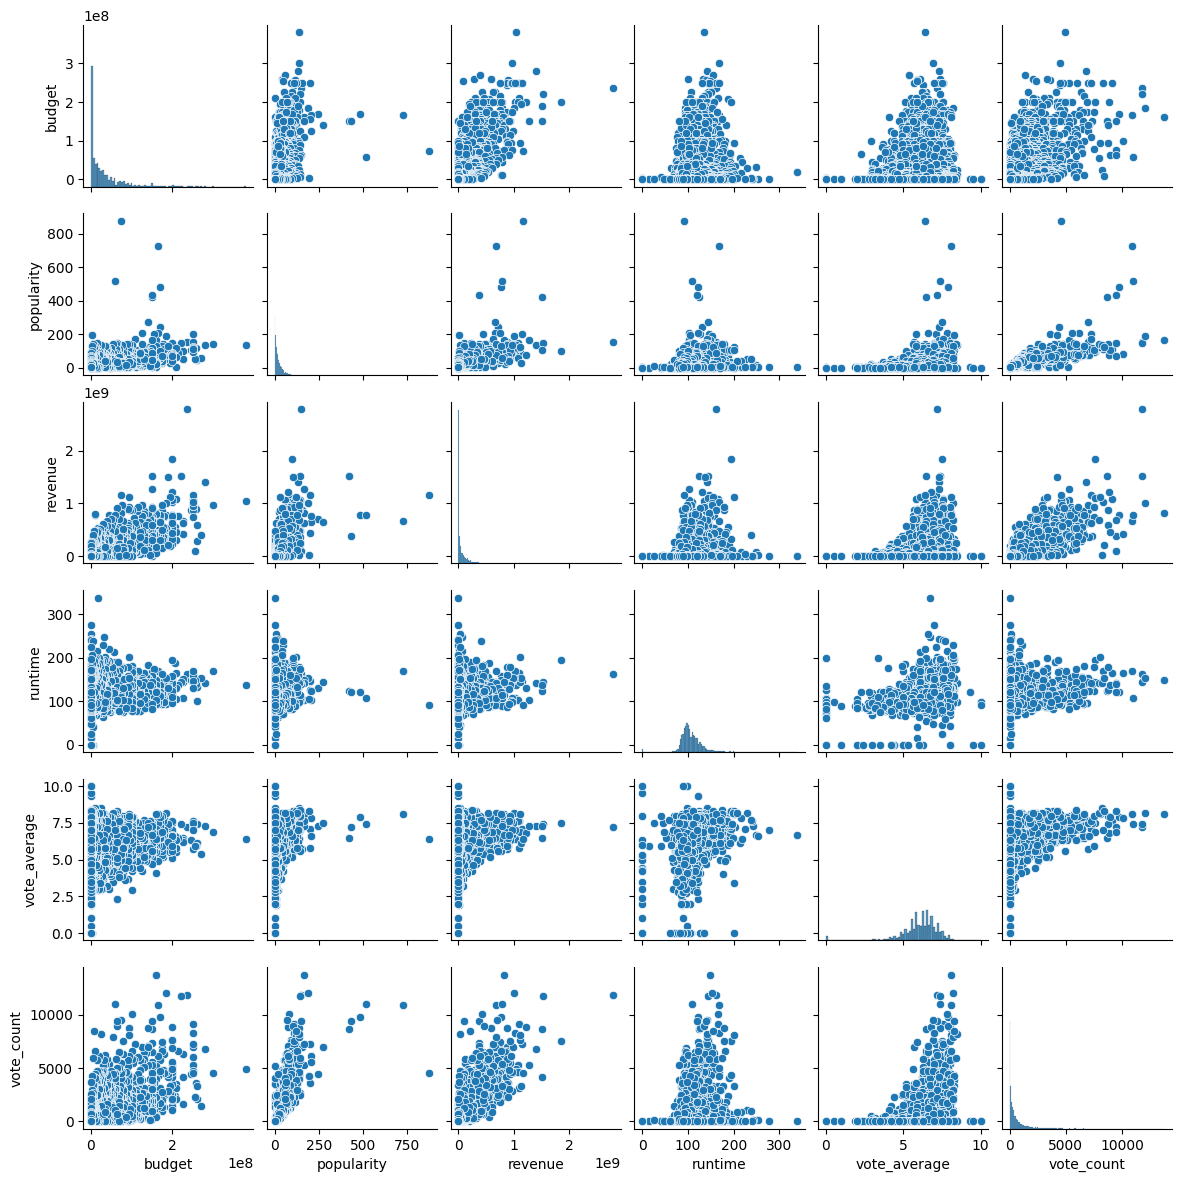

In [ ]:
### Exploring the relationships between the numerical data

sns.pairplot(df,height=2)

Looking at the distributions of the columns (where the names intersect with themselves) a similar pattern occurs for budget, popularity, revenue and vote count. This pattern is a large peak on the left indicating a large number of films around that point. At first glace this would suggest many films that have low budgets, low popularity, revenue and votecount.

In terms of these values relationships to eachother, nothing is extremely clear from the plots, a few seem to have positive correlations such as vote_count, popularity and revenue. However this is better explored in a correlation matrix.

In [ ]:
df.corr()

<ipython-input-395-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,budget,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.505414,0.730823,0.269851,0.093146,0.593180
popularity,0.505414,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,0.778130,0.781487,0.271944,0.312997,1.000000


<ipython-input-396-53e6fdc7e188>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),
<ipython-input-396-53e6fdc7e188>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(df.corr()),


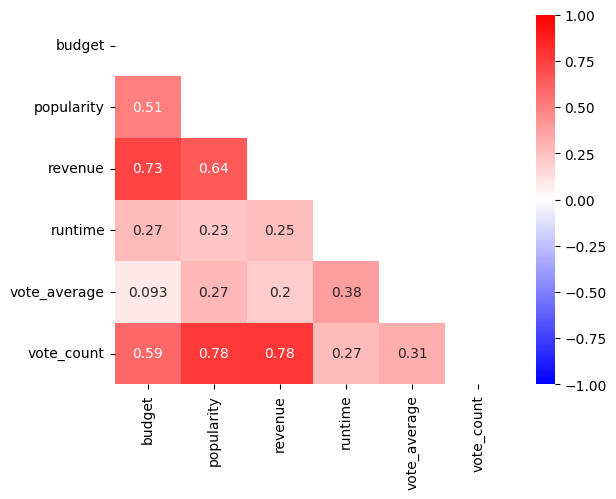

In [ ]:
sns.heatmap(df.corr(),
           annot=True,
           mask = np.triu(df.corr()),
           cmap = 'bwr',
           vmin=-1,
            vmax=1);
plt.show();

The heatmap of the correlations is able to show the relationships between to columns in the data.

A coefficient above 0.7 is highly correlated, above 0.5 is moderately and below that have a low correlation.

The stand out correations are highlighted in bright red:

Highly correlated: revenue x budget, revenue x popularity, vote_count x popularity, vote_count x revenue.

There a few moderately correlated too : popularity x budget, vote_count x budget.

Apart from these there are no notable correlations.




Going through the numerical data:
*   budget
*   revenue
*   vote_average
*   vote_count
*   run_time



## Budget

In [ ]:
df["budget"].describe()

count    4.803000e+03
mean     2.904504e+07
std      4.072239e+07
min      0.000000e+00
25%      7.900000e+05
50%      1.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

<Axes: xlabel='budget', ylabel='Count'>

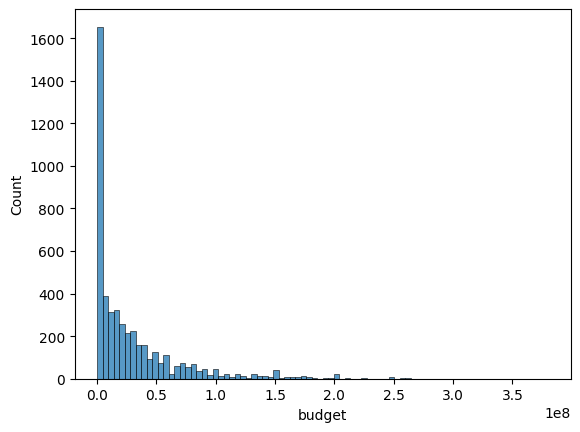

In [ ]:
sns.histplot(df["budget"])

From the distribution we can see that the majority of the films are within 0.1e8, even 0.5e8.

Therefore it is valuable to zoom into these data points to get a better view of the distribution down at the bottom.

<Axes: xlabel='budget', ylabel='Count'>

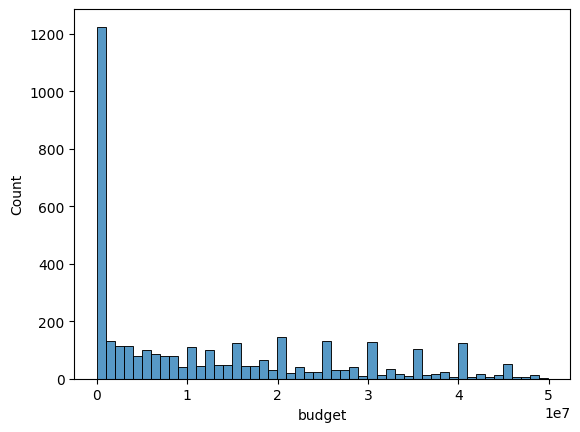

In [ ]:
sns.histplot(df["budget"][df["budget"]<0.5e8],bins=50)

Even zooming in x 10, there is still a massive skew to on the cheap films, zooming in more:

<Axes: xlabel='budget', ylabel='Count'>

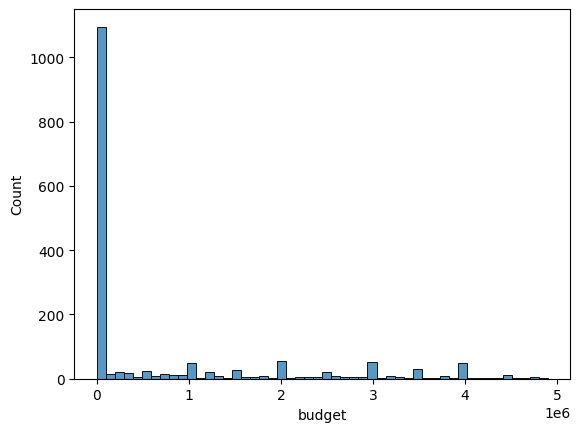

In [ ]:
sns.histplot(df["budget"][df["budget"]<0.5e7],bins=50)

Now we're looking at the films up to 5 million, still the distribution shows that most of the movies are in the small million category.

<Axes: xlabel='budget', ylabel='Count'>

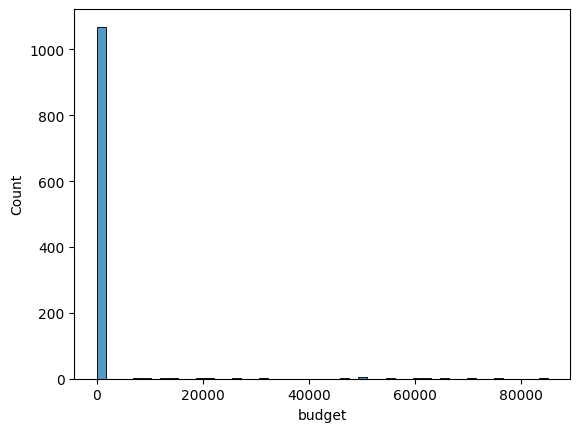

In [ ]:
sns.histplot(df["budget"][df["budget"]<0.1e6],bins=50)

<Axes: xlabel='budget', ylabel='Count'>

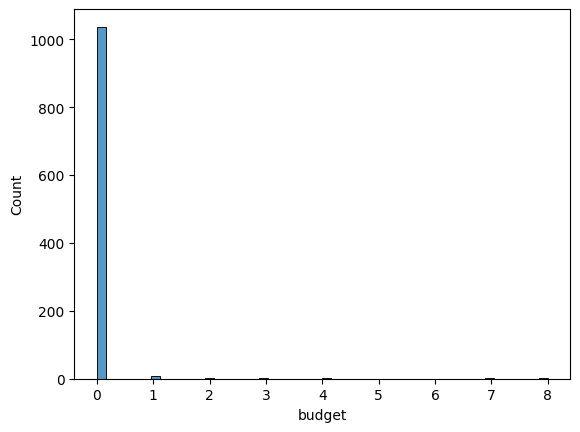

In [ ]:
sns.histplot(df["budget"][df["budget"]<10],bins=50)

Here we have the realisation that these are not only cheap movies, but movies made with a budget of 0.

Now this could be an error in the data, perhaps where the information was not able to be collected as its unrealitic for a film to cost 0.

We can therefore semi-ignore these points in our dist plot as they don't really give us useful information.

<Axes: xlabel='budget', ylabel='Count'>

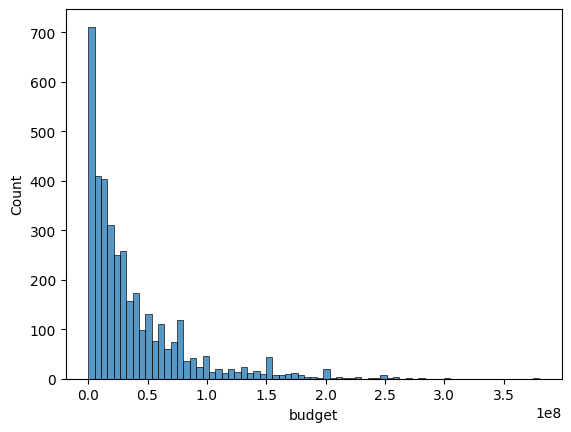

In [ ]:
sns.histplot(df["budget"][df["budget"]>0])

## Revenue

<Axes: xlabel='revenue', ylabel='Count'>

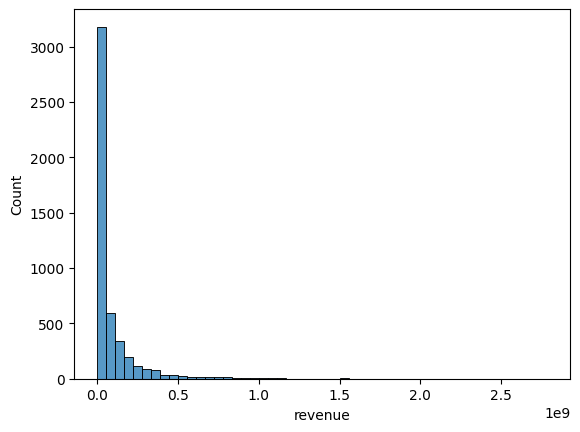

In [ ]:
sns.histplot(df["revenue"][df["revenue"]>=0],bins=50)

<Axes: xlabel='revenue', ylabel='Count'>

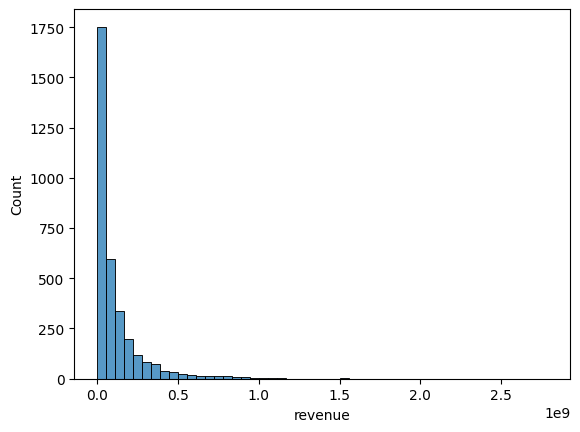

In [ ]:
sns.histplot(df["revenue"][df["revenue"]>0],bins=50)

This time the first thing I did was look at the graph with all revenues vs the graph with the 0 revenues taken out.

A noticable portion of the revenue was also 0. I need to do some exploring to see if these columns match up in the data set.

In [ ]:
df[["revenue","budget"]].where(df["revenue"]==0)

,revenue,budget
id,,
19995,NaN,NaN
285,NaN,NaN
206647,NaN,NaN
49026,NaN,NaN
49529,NaN,NaN
...,...,...
9367,NaN,NaN
72766,0.0,9000.0
231617,0.0,0.0


<Axes: xlabel='revenue', ylabel='Count'>

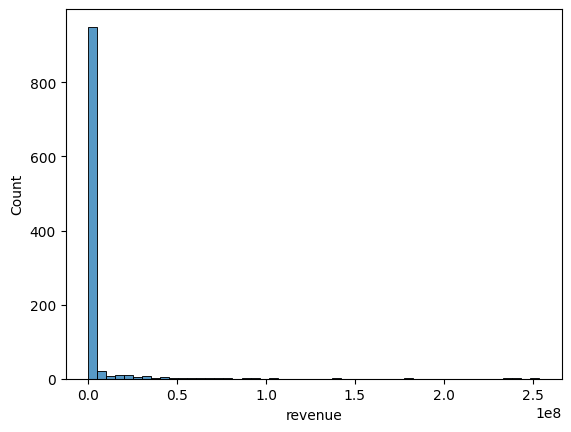

In [ ]:
sns.histplot(df["revenue"][df["budget"]==0],bins=50)

<Axes: xlabel='budget', ylabel='Count'>

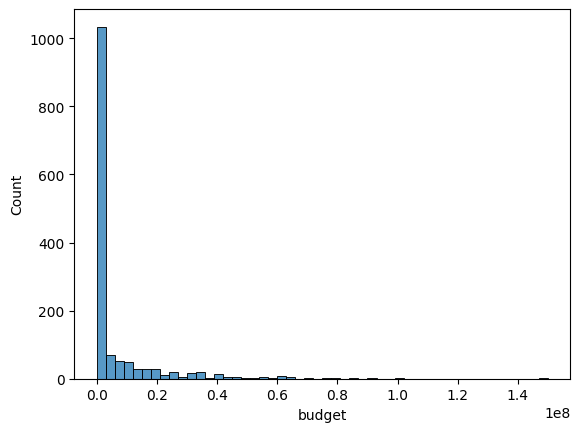

In [ ]:
sns.histplot(df["budget"][df["revenue"]==0],bins=50)

It appears that many points where the budget = 0, so does the revenue but this is not completely true, with there also being plenty of points, especially in budget count where it does not apply. If we are going by the speculation from earlier that the 0 values are points where data could not be found it would suggest that the budget data is more easily accessible than the revenue.

These two values had a significant correlation before, but what effect were all these zero values having on it. Therefore we are going to make a new dataset where the 0 values are removed.

In [ ]:
rev_bud = df[df["budget"]>0]
rev_bud = rev_bud[rev_bud["revenue"]>0]

In [ ]:
rev_bud.count()

budget                  3229
genres                  3229
homepage                1347
keywords                3229
original_language       3229
original_title          3229
overview                3229
popularity              3229
production_companies    3229
production_countries    3229
release_date            3229
revenue                 3229
runtime                 3229
spoken_languages        3229
status                  3229
tagline                 2984
title                   3229
vote_average            3229
vote_count              3229
dtype: int64

This has removed a significant amout of rows, however I beleive that these two columns are the most imporant data points in the dataset, and therefore removing the points that will cloud the analysis is important.

In [ ]:
rev_bud.corr()

<ipython-input-411-ca7daf998adb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rev_bud.corr()


,budget,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.431990,0.705399,0.229490,-0.031208,0.540165
popularity,0.431990,1.000000,0.602246,0.182198,0.286994,0.749088
revenue,0.705399,0.602246,1.000000,0.233074,0.187839,0.756210
runtime,0.229490,0.182198,0.233074,1.000000,0.378641,0.257922
vote_average,-0.031208,0.286994,0.187839,0.378641,1.000000,0.377658
vote_count,0.540165,0.749088,0.756210,0.257922,0.377658,1.000000


<ipython-input-412-73824287d75e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rev_bud.corr(),
<ipython-input-412-73824287d75e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(df.corr()),


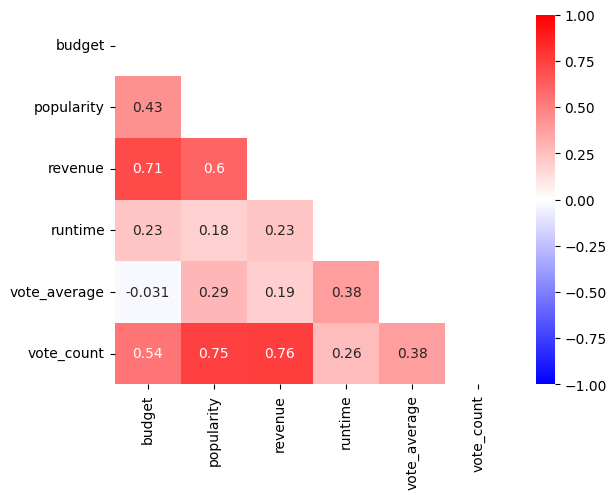

In [ ]:
sns.heatmap(rev_bud.corr(),
           annot=True,
           mask = np.triu(df.corr()),
           cmap = 'bwr',
           vmin=-1,
            vmax=1);
plt.show();

We can see that even after removing all the suspicious data points the correlations mostly remain the same. Ever so slightly lower.

Plotting the strongest correlated values should show a clear correlated graph.

<Axes: xlabel='budget', ylabel='revenue'>

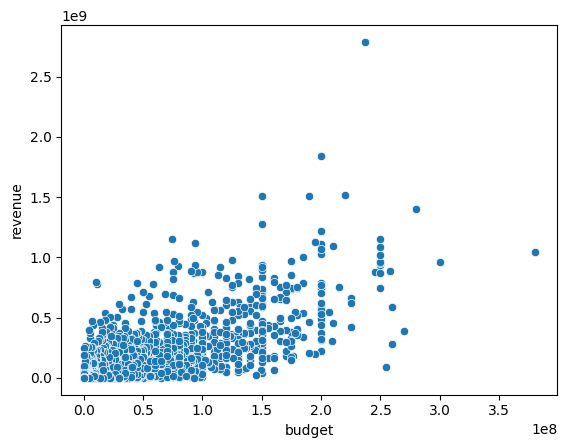

In [ ]:
sns.scatterplot(data=rev_bud, x="budget",y="revenue")

<Axes: xlabel='popularity', ylabel='revenue'>

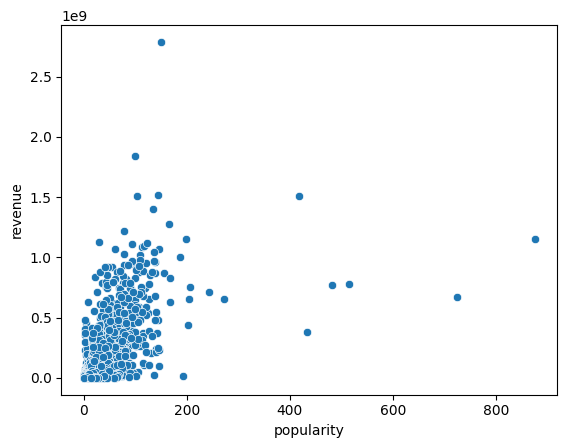

In [ ]:
sns.scatterplot(data=rev_bud, x="popularity",y="revenue")

# KEY POINT 1:

The relationship between budget and revenue is an important one for businesses, as these are the factors that determine the ROI of a film project.

Therefore I will dive slightly further into this relationship

<Axes: xlabel='budget', ylabel='revenue'>

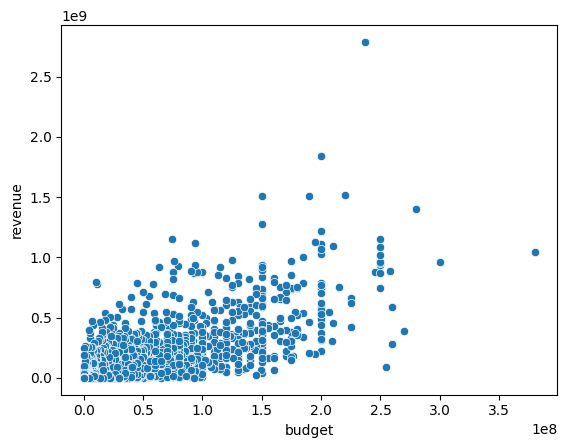

In [ ]:
sns.scatterplot(data=rev_bud, x="budget",y="revenue")

In [ ]:
a, b = np.polyfit(rev_bud["budget"], rev_bud["revenue"], 1)

Text(0.5, 1.0, 'Revenue Vs Budget')

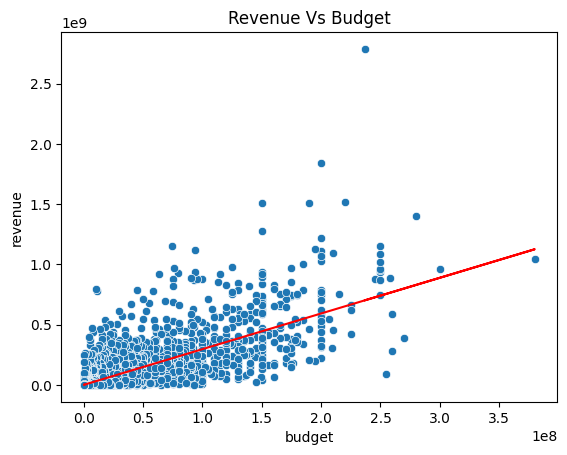

In [ ]:
sns.scatterplot(data=rev_bud, x="budget",y="revenue")
plt.plot(rev_bud["budget"], a*rev_bud["budget"]+b,color="red")
plt.title("Revenue Vs Budget")

In [ ]:
print(a)

2.9600801825328795


Here a line of bests fit has been plotted over the revenue v budget data.
There is a positive correation between these two values where a larger budget tends to lead to a higher revenue.

The gradient coefficient calculated using numpys polyplot is approximately 3.

It should be noted that this is using the dataset with the zero budget and revenue values removed.

Text(0.5, 1.0, 'Revenue Vs Budget')

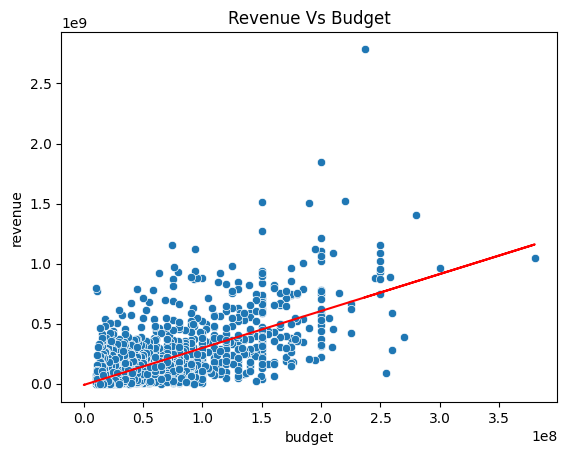

In [ ]:
sns.scatterplot(data=rev_bud[rev_bud["budget"]>0.1e8], x="budget",y="revenue")
a, b = np.polyfit(rev_bud["budget"][rev_bud["budget"]>0.1e8], rev_bud["revenue"][rev_bud["budget"]>0.1e8], 1)
plt.plot(rev_bud["budget"], a*rev_bud["budget"]+b,color="red")
plt.title("Revenue Vs Budget")

In [ ]:
print(a)

3.0785333118070333


Increasing the threshold budget from 0 to 10Million we can see an slight increase in the gradient but nothing significant.

I am exploring these smaller subsets of reveneue vs budget as it is at these larger values where the relationship is more important, as the risk of making a larger loss on a film becomes greater.

Text(0.5, 1.0, 'Revenue Vs Budget')

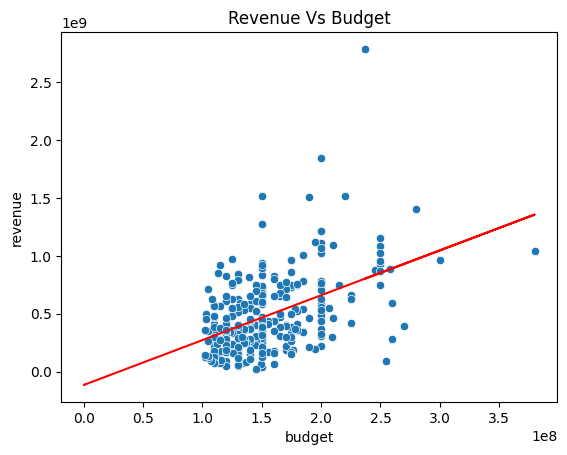

In [ ]:
sns.scatterplot(data=rev_bud[rev_bud["budget"]>1e8], x="budget",y="revenue")
a, b = np.polyfit(rev_bud["budget"][rev_bud["budget"]>1e8], rev_bud["revenue"][rev_bud["budget"]>1e8], 1)
plt.plot(rev_bud["budget"], a*rev_bud["budget"]+b,color="red")
plt.title("Revenue Vs Budget")

In [ ]:
print(a)

3.873657735485243


Increasing the budget threshold to 100M and the gradient coefficient raised to almost 4.

Text(0.5, 1.0, 'Revenue Vs Budget')

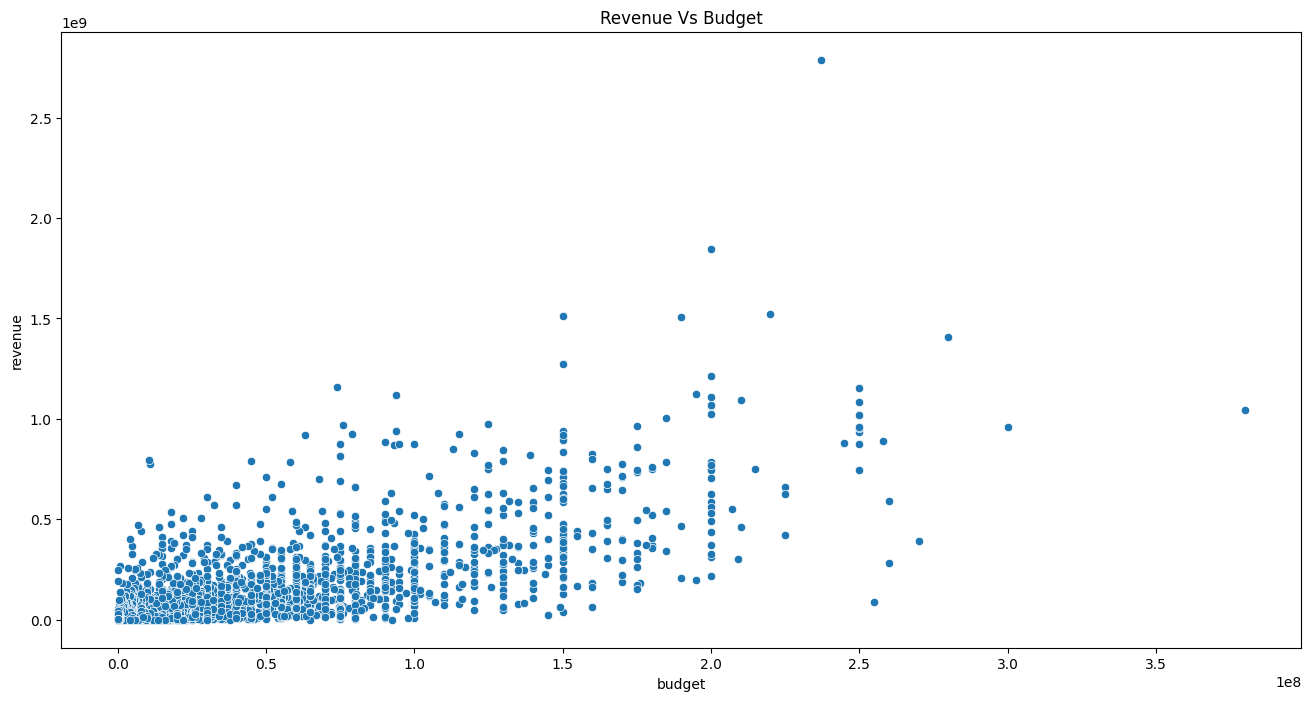

In [ ]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=rev_bud, x="budget",y="revenue")

plt.title("Revenue Vs Budget")

One interesting feature found in the budget data are the lines of constant budget. They are noticed by the rows of perfectly straight budget. And often appear at "nice" "whole" round numbers such as 2.5, 2, 1.5, 1 etc

## Looking into the most successful movies genres

In [ ]:
df.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
19995,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","US, GB",2009-12-10,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800
285,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",US,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [ ]:
genres = []
for i in all_genre:
  genres.append(i.get("name"))

In [ ]:
genre_counts = []
for i in genres:
  genre_counts.append(df["genres"].str.contains(i).sum())

In [ ]:
genre_counts_sorted = genre_counts.copy()
genre_counts_sorted.sort(reverse=True)

In [ ]:
genres_sorted = []
for i in genre_counts_sorted:
  genre_id = genre_counts.index(i)
  genres_sorted.append(genres[genre_id])

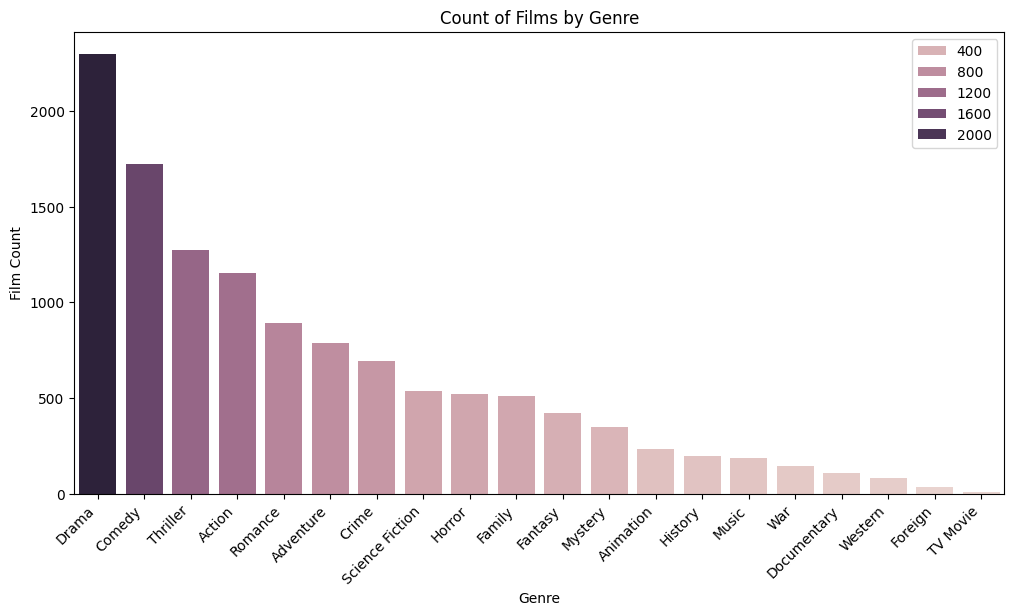

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genres_sorted,y=genre_counts_sorted,hue=genre_counts_sorted)
plt.xlabel("Genre")
plt.ylabel("Film Count")
plt.title("Count of Films by Genre")
plt.xticks(rotation=45, ha='right');

In [ ]:
genre_sums = []
for i in genres:
  total_revenue = df["revenue"][df["genres"].str.contains(i)].sum()
  genre_sums.append(total_revenue)

In [ ]:
genre_sums_sorted = genre_sums.copy()
genre_sums_sorted.sort(reverse=True)

genres_sorted = []
for i in genre_sums_sorted:
  genre_id = genre_sums.index(i)
  genres_sorted.append(genres[genre_id])

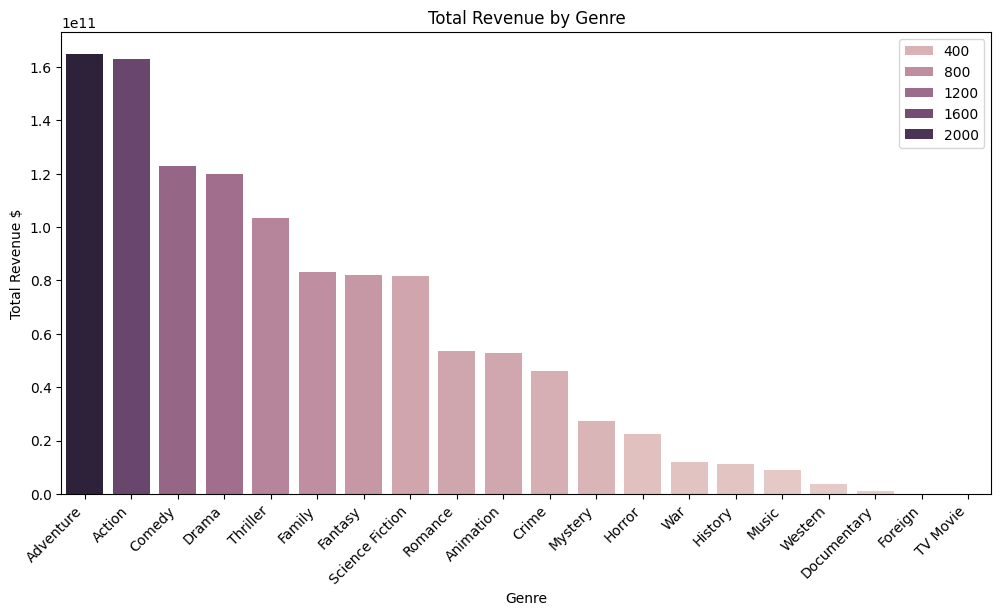

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genres_sorted,y=genre_sums_sorted,hue=genre_counts_sorted)
plt.xlabel("Genre")
plt.ylabel("Total Revenue $")
plt.title("Total Revenue by Genre")
plt.xticks(rotation=45, ha='right');

In [ ]:
top100 = df.sort_values("revenue",ascending=False).head(100)

In [ ]:
top100.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
19995,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","US, GB",2009-12-10,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800
597,200000000,"Drama, Romance, Thriller",http://www.titanicmovie.com,"shipwreck, iceberg, ship, panic, titanic, ocea...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"Paramount Pictures, Twentieth Century Fox Film...",US,1997-11-18,1845034188,194.0,"English, Français, Deutsch, svenska, Italiano,...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562


# Visualisation 1

In [ ]:
genres = []
for i in all_genre:
  genres.append(i.get("name"))

genre_counts = []
for i in genres:
  genre_counts.append(top100["genres"].str.contains(i).sum())

In [ ]:
genre_counts_sorted = genre_counts.copy()
genre_counts_sorted.sort(reverse=True)

genres_sorted = []
for i in genre_counts_sorted:
  genre_id = genre_counts.index(i)
  genres_sorted.append(genres[genre_id])

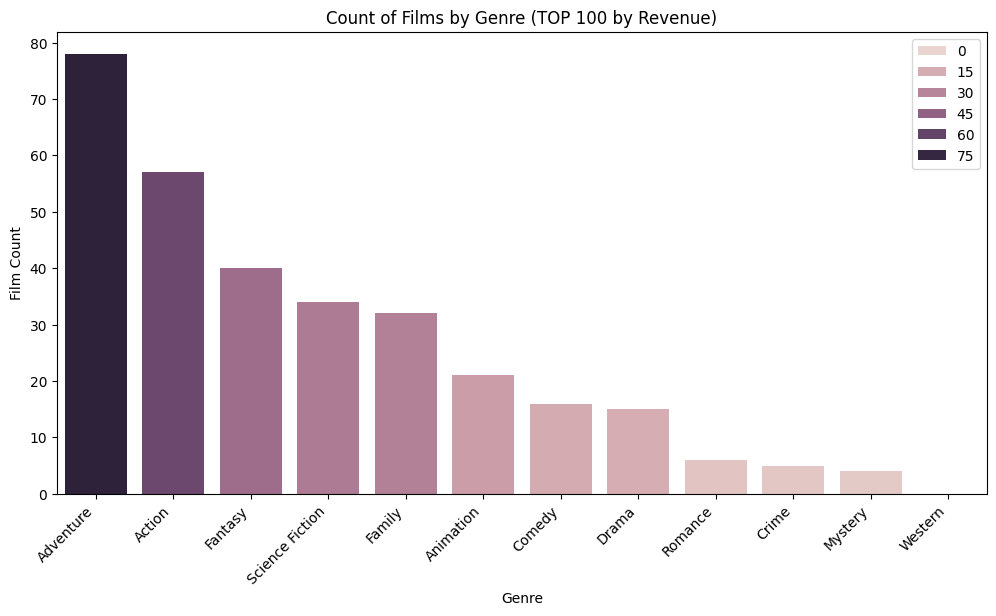

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genres_sorted,y=genre_counts_sorted,hue=genre_counts_sorted)
plt.xlabel("Genre")
plt.ylabel("Film Count")
plt.title("Count of Films by Genre (TOP 100 by Revenue)")
plt.xticks(rotation=45, ha='right');

## Looking into Production Company

In [ ]:
prods = []
for i in all_companies:
  prods.append(i.get("name"))

prods_counts = []
for i in prods:
  prods_counts.append(df["production_companies"].str.contains(i).sum());

<ipython-input-438-7542905f13a2>:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  prods_counts.append(df["production_companies"].str.contains(i).sum());


In [ ]:
prods_counts_sorted = prods_counts.copy()
prods_counts_sorted.sort(reverse=True)

prods_sorted = []
for i in prods_counts_sorted:
  prod_id = prods_counts.index(i)
  prods_sorted.append(prods[prod_id])

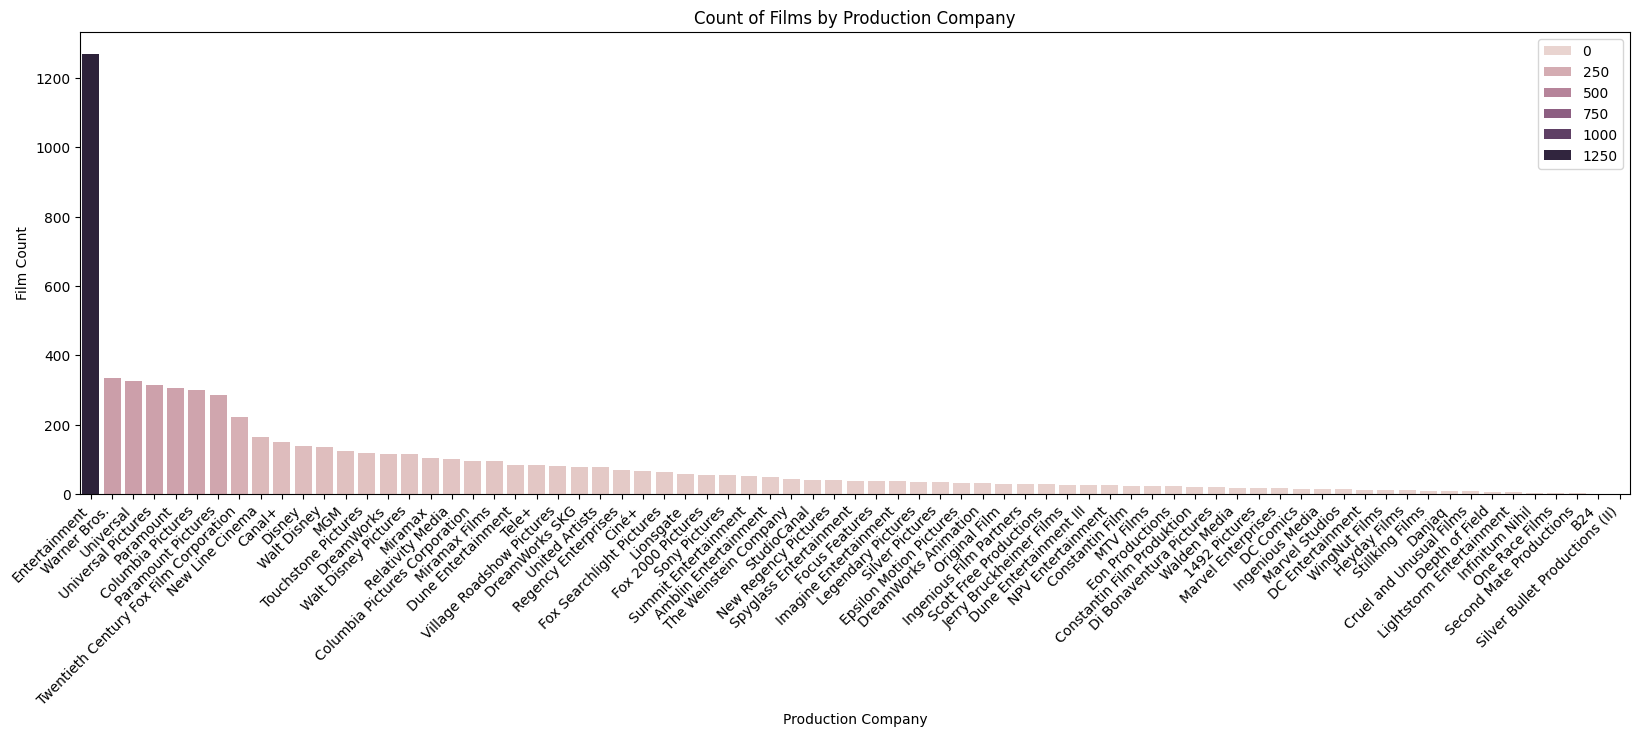

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(x=prods_sorted,y=prods_counts_sorted,hue=prods_counts_sorted)
plt.xlabel("Production Company")
plt.ylabel("Film Count")
plt.title("Count of Films by Production Company")
plt.xticks(rotation=45, ha='right');

Here I noticed that the contain function was not working as I had hoped, it was picking up parts of the production companies instead of the full name.

In [ ]:
df[df["production_companies"].str.contains("Entertainment")].head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
19995,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","US, GB",2009-12-10,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800
49026,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",US,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106


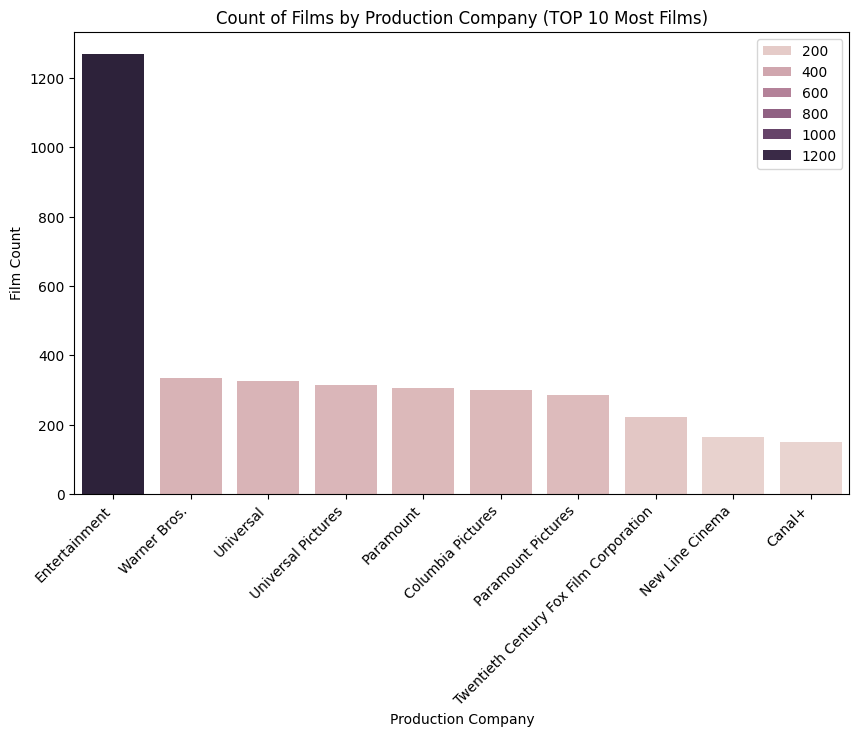

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=prods_sorted[:10],y=prods_counts_sorted[:10],hue=prods_counts_sorted[:10])
plt.xlabel("Production Company")
plt.ylabel("Film Count")
plt.title("Count of Films by Production Company (TOP 10 Most Films)")
plt.xticks(rotation=45, ha='right');

In [ ]:
prod_sums = []
for i in prods:
  total_revenue = df["revenue"][df["production_companies"].str.contains(i)].sum()
  prod_sums.append(total_revenue)

<ipython-input-442-87c397637633>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  total_revenue = df["revenue"][df["production_companies"].str.contains(i)].sum()


In [ ]:
prod_sums_sorted = prod_sums.copy()
prod_sums_sorted.sort(reverse=True)

In [ ]:
prods_sorted = []
for i in prod_sums_sorted:
  prod_id = prod_sums.index(i)

  prods_sorted.append(prods[prod_id])

In [ ]:
print(len(prod_sums_sorted))
print(len(prods_sorted))

5047
5047


Since these are so big, there is not going to be a clear way to visualise them, so the data was cut down to only the top 20 grossing production companies

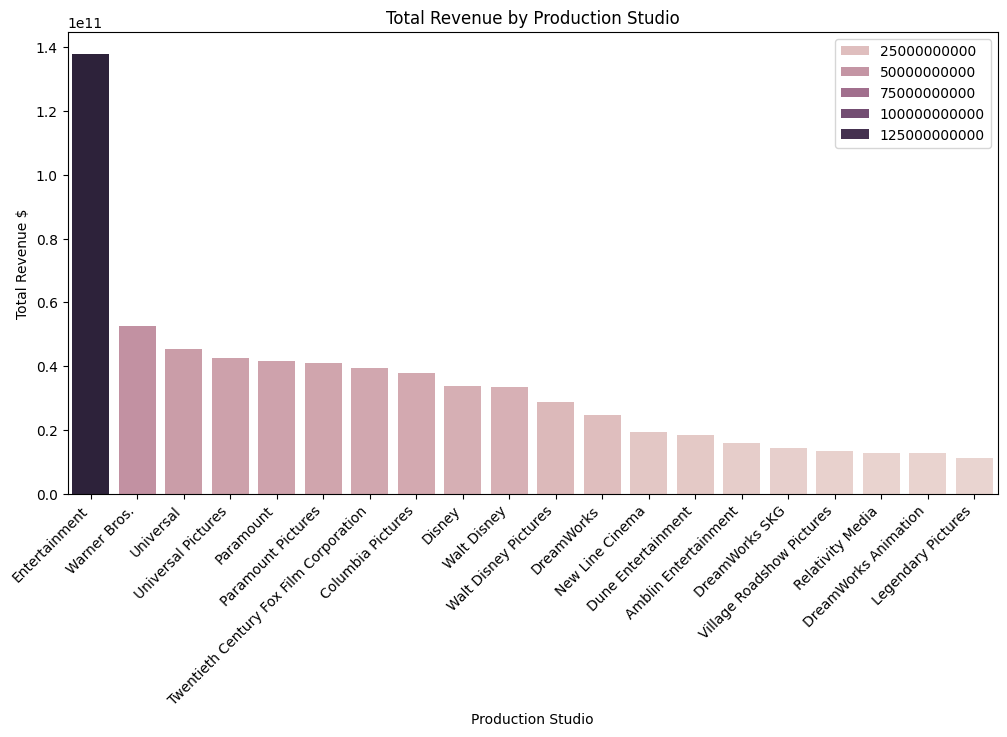

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=prods_sorted[:20],y=prod_sums_sorted[:20],hue=prod_sums_sorted[:20])
plt.xlabel("Production Studio")
plt.ylabel("Total Revenue $")
plt.title("Total Revenue by Production Studio")
plt.xticks(rotation=45, ha='right');

These values for Entertainment are extremely high vs the others, this is where I realised my error in the way the I had used the contain function.


However due to the time contrainsts of the project, I decided to leave this till another time as I wasn't sure how to fix it at this point and didn't wanat to spend all my time figuring it out.

Sometimes the average revenue can be more of an indicator on how sucessful a studio is despite the length of time that they have been around.

In [ ]:
prod_avg_sum = []
for i in prods:
  avg_revenue = df["revenue"][df["production_companies"].str.contains(i)].mean()
  prod_avg_sum.append(avg_revenue)

<ipython-input-448-8d829430e3a7>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  avg_revenue = df["revenue"][df["production_companies"].str.contains(i)].mean()


In [ ]:
prod_avg_sum_sorted = prod_avg_sum.copy()
prod_avg_sum_sorted.sort(reverse=True)

prods_sorted = []
for i in prod_avg_sum_sorted:
  prod_id = prod_avg_sum.index(i)

  prods_sorted.append(prods[prod_id])

Once again only taking the top 20

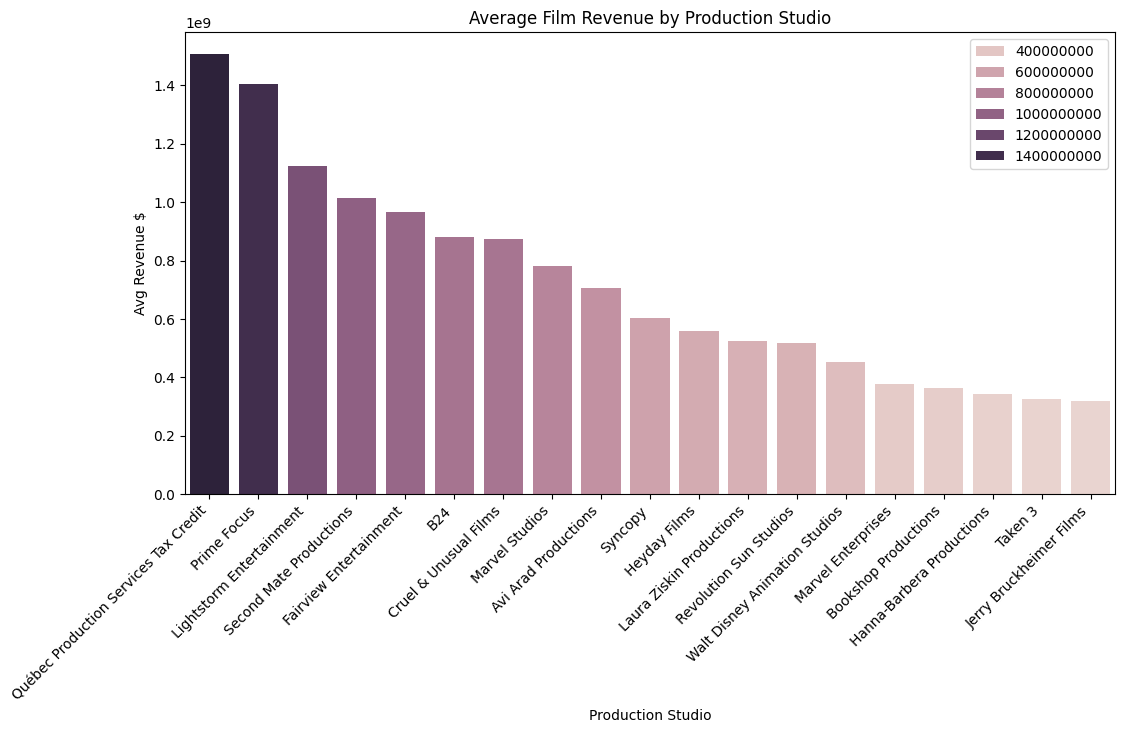

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=prods_sorted[:20],y=prod_avg_sum_sorted[:20],hue=prod_avg_sum_sorted[:20])
plt.xlabel("Production Studio")
plt.ylabel("Avg Revenue $")
plt.title("Average Film Revenue by Production Studio")
plt.xticks(rotation=45, ha='right');

# Figures By Country

In [ ]:
country = []
for i in all_countries:
  country.append(i.get("iso_3166_1"))

country_counts = []
for i in country:
  country_counts.append(df["production_countries"].str.contains(i).sum());

In [ ]:
country_counts_sorted = country_counts.copy()
country_counts_sorted.sort(reverse=True)

country_sorted = []
for i in country_counts_sorted:
  country_id = country_counts.index(i)
  country_sorted.append(country[country_id])

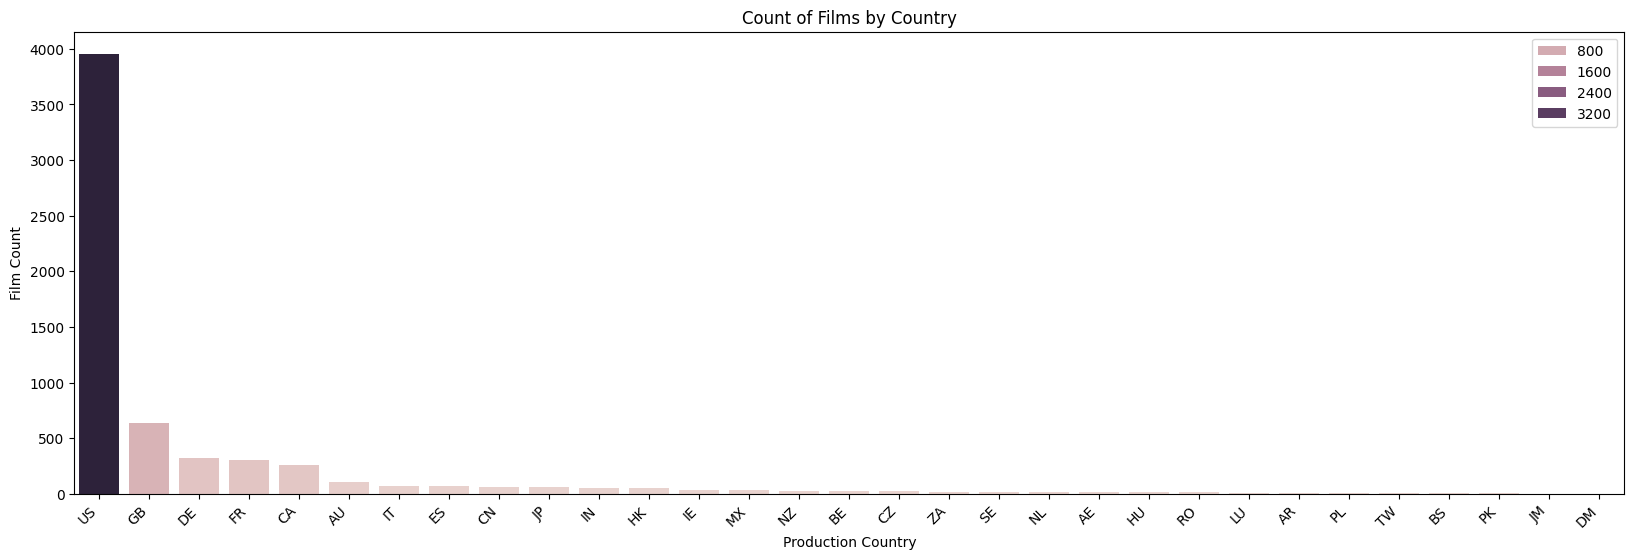

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(x=country_sorted,y=country_counts_sorted,hue=country_counts_sorted)
plt.xlabel("Production Country")
plt.ylabel("Film Count")
plt.title("Count of Films by Country")
plt.xticks(rotation=45, ha='right');

In [ ]:
country_avg_sum = []
for i in country:
  avg_revenue = df["revenue"][df["production_countries"].str.contains(i)].mean()
  country_avg_sum.append(avg_revenue)

In [ ]:
country_avg_sum_sorted = country_avg_sum.copy()
country_avg_sum_sorted.sort(reverse=True)

country_sorted = []
for i in country_avg_sum_sorted:
  country_id = country_avg_sum.index(i)

  country_sorted.append(country[country_id])

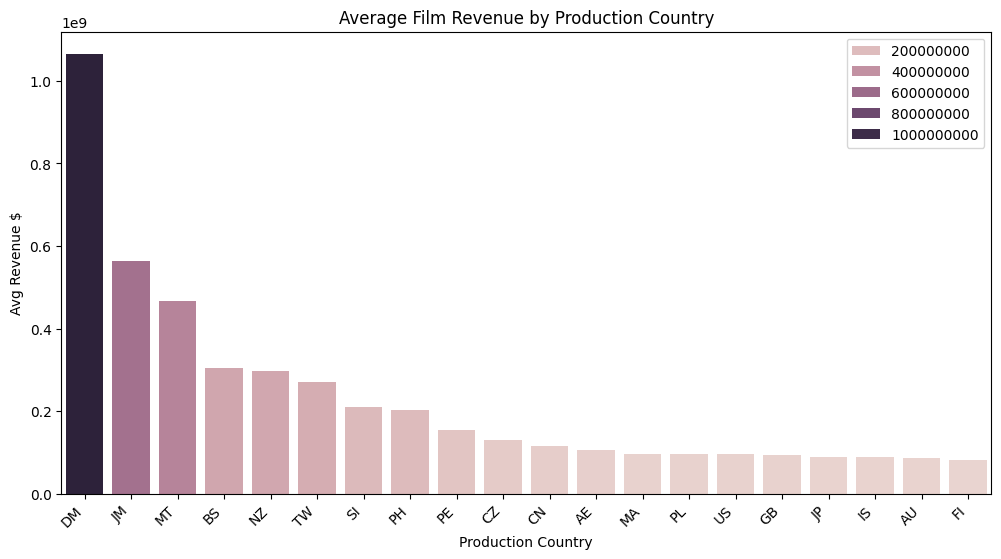

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=country_sorted[:20],y=country_avg_sum_sorted[:20],hue=country_avg_sum_sorted[:20])
plt.xlabel("Production Country")
plt.ylabel("Avg Revenue $")
plt.title("Average Film Revenue by Production Country")
plt.xticks(rotation=45, ha='right');

## Figures By Year

In [ ]:
df.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
19995,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","US, GB",2009-12-10,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800
285,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",US,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [ ]:
yearly_df = df.groupby((df['release_date'].dt.year)).sum()

<ipython-input-458-c7bd890b2d2c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_df = df.groupby((df['release_date'].dt.year)).sum()


In [ ]:
yearly_df

,budget,popularity,revenue,runtime,vote_average,vote_count
release_date,,,,,,
1916.0,385907,3.232447,8394751,197.0,7.4,60
1925.0,245000,0.785744,22000000,151.0,7.0,21
1927.0,92620000,32.351527,650422,153.0,8.0,657
1929.0,379000,2.793049,4358000,209.0,12.6,64
1930.0,3950000,8.484123,8000000,127.0,6.1,19
...,...,...,...,...,...,...
2013.0,8205880834,6499.395558,23411493295,24317.0,1406.6,262402
2014.0,7368453311,8920.269880,24120490589,24303.0,1327.8,248987
2015.0,6724547367,8047.481096,22775024221,22073.0,1208.3,210378


# Key Point 2

Text(0.5, 1.0, 'Sum Of Revenue Per Year')

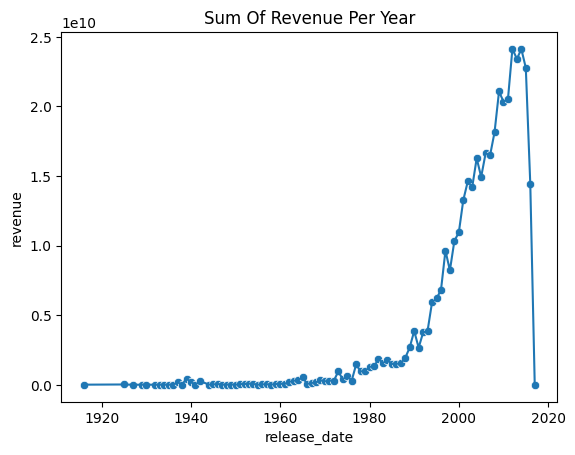

In [ ]:
sns.lineplot(yearly_df, x=yearly_df.index, y = "revenue")
sns.scatterplot(yearly_df, x=yearly_df.index, y = "revenue")
plt.title("Sum Of Revenue Per Year")

Since 2017 is a lot smaller than the rest, we are to assume this is because the year hasnt finished therefore we will remove this year.

In [ ]:
yearly_df = yearly_df.iloc[:-1]

In [ ]:
yearly_df.tail(5)

,budget,popularity,revenue,runtime,vote_average,vote_count
release_date,,,,,,
2012.0,7263782654,5309.630764,24141710246,21463.0,1229.2,229979
2013.0,8205880834,6499.395558,23411493295,24317.0,1406.6,262402
2014.0,7368453311,8920.269880,24120490589,24303.0,1327.8,248987
2015.0,6724547367,8047.481096,22775024221,22073.0,1208.3,210378
2016.0,4753140000,3861.383972,14461156948,11193.0,606.7,119224


Text(0.5, 1.0, 'Sum of Revenue Per Year')

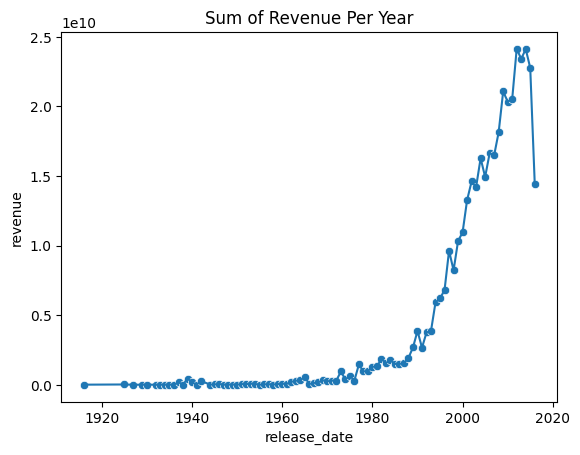

In [ ]:
sns.lineplot(yearly_df, x=yearly_df.index, y = "revenue")
sns.scatterplot(yearly_df, x=yearly_df.index, y = "revenue")
plt.title("Sum of Revenue Per Year")

We can still see a drop off in revenue in 2016.

Lets examine this further.

In [ ]:
yearly_count = df.groupby((df['release_date'].dt.year)).count()
yearly_count = yearly_count.iloc[:-1]

Text(0.5, 1.0, 'Count of Films Released Vs Year')

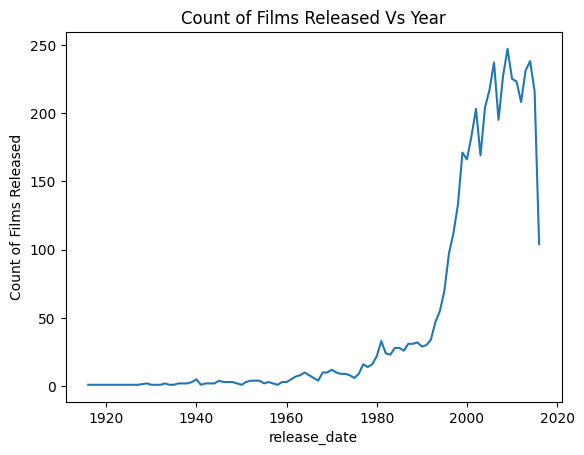

In [ ]:
sns.lineplot(yearly_count, x=yearly_count.index, y = "budget")
plt.ylabel("Count of Films Released")
plt.title("Count of Films Released Vs Year")

Here we can see a significant relationship between the films released and total revenue, as expected, and increase in films leads to an increase in revenue. What about average revenue per film?

In [ ]:
yearly_avg_rev = df.groupby((df['release_date'].dt.year)).mean()

<ipython-input-466-e9b81944764a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_avg_rev = df.groupby((df['release_date'].dt.year)).mean()


Text(0.5, 1.0, 'Average Film Revenue Vs Year')

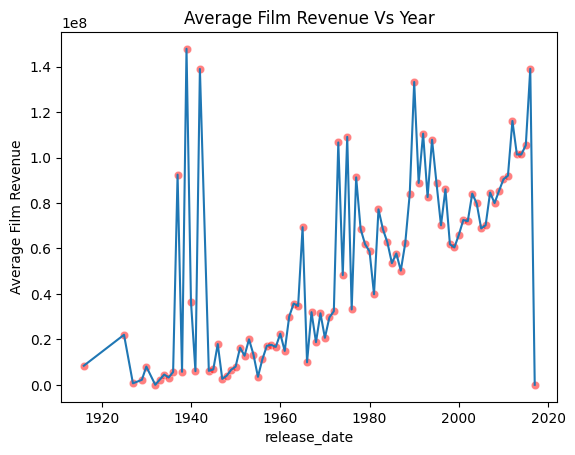

In [ ]:
sns.lineplot(yearly_avg_rev, x=yearly_avg_rev.index, y = "revenue")
sns.scatterplot(yearly_avg_rev, x=yearly_avg_rev.index, y = "revenue",color="red",alpha=0.5)
plt.ylabel("Average Film Revenue")
plt.title("Average Film Revenue Vs Year")

Looking at this graph we can see that some early years, around 1940 had extremely high revenues if the inflation rate has not been accounted for. This is meta data that we don't quite know but we are going to assume that the inflation rate has been calculated into the data otherwise these points would definetly have to be some sort of error.

We have seen a trend upwards with the number of films being made and revenues grossed per movies. With the technology over time becoming much more sophisticated and digitalised I am interested to see how the length of the movies have changed over time.

Also 2016 is extremly low, and therefore it may be due to the lack of time these movies have had in order to make the revenue, but this will need to be explored even further.

In [ ]:
yearly_avg_time = df.groupby((df['release_date'].dt.year)).mean()

<ipython-input-468-97b6d8f37dae>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_avg_time = df.groupby((df['release_date'].dt.year)).mean()


# Python Visulisation 2

Text(0.5, 1.0, 'Average Film Runtime Vs Year')

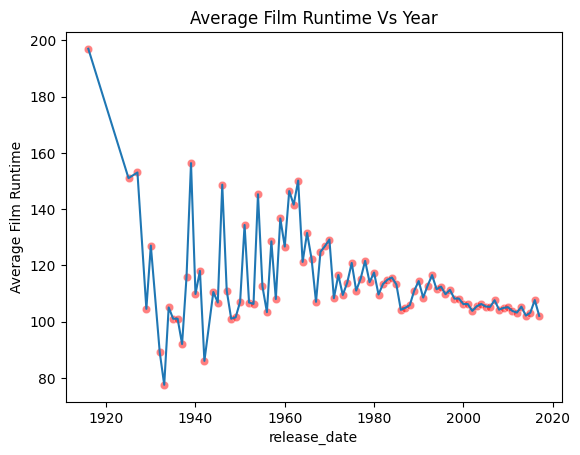

In [ ]:
sns.lineplot(yearly_avg_time, x=yearly_avg_time.index, y = "runtime")
sns.scatterplot(yearly_avg_time, x=yearly_avg_time.index, y = "runtime",color="red",alpha=0.5)
plt.ylabel("Average Film Runtime")
plt.title("Average Film Runtime Vs Year")

This is a very interesting plot, it seems that over time there has become a focus into a specific time range. It is also interesting that over the years the average runtime has fluctated above and below this converging point.

# Most popular themes in movies

Looking into the keywords in the largest grossing movies

In [ ]:
top100.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
19995,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","US, GB",2009-12-10,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800
597,200000000,"Drama, Romance, Thriller",http://www.titanicmovie.com,"shipwreck, iceberg, ship, panic, titanic, ocea...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"Paramount Pictures, Twentieth Century Fox Film...",US,1997-11-18,1845034188,194.0,"English, Français, Deutsch, svenska, Italiano,...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562


In [ ]:
info_string = ""
for i in top100["keywords"]:
  info_string += i

In [ ]:
from wordcloud import WordCloud

# Python Visulisation 3

(-0.5, 799.5, 399.5, -0.5)

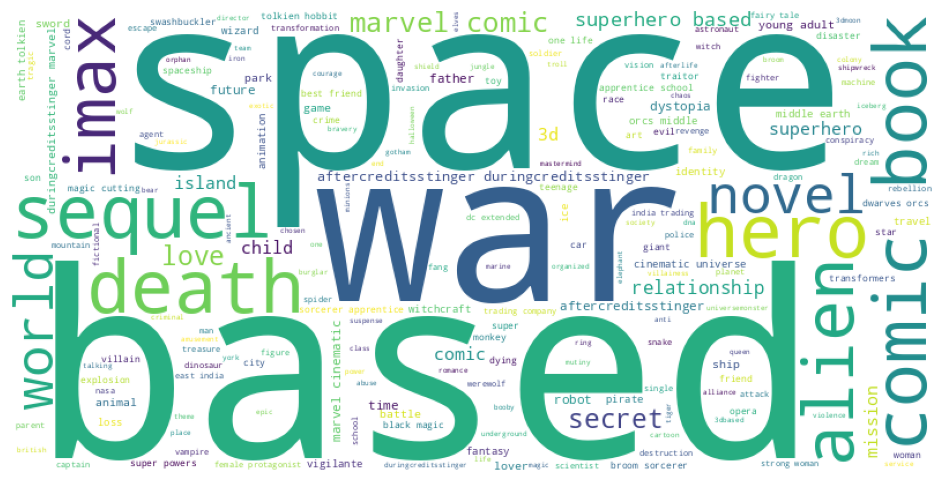

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(info_string)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
#https://www.datacamp.com/tutorial/wordcloud-python

This visualisation shows the most common key words from the top100 movie. As you can see there seems to be a theme in the most successful movies of sci-fic and comiciy super heros etc. This is likely due to certain popular franchises such as Marvel and Star Wars not only making up a larger proporiton of the top 100 but also inspiring similar films in these genres.

## In Depth on 2 Films

# Film 1

The first movie to be explored is the one with the most revenue, as this will be the most important kpi for most film productions.

Therefore the first film for an indepth breakdown is "Avatar"

In [ ]:
avatar = df[df["title"]=="Avatar"]

In [ ]:
avatar["production_companies"]

id
19995    Ingenious Film Partners, Twentieth Century Fox...
Name: production_companies, dtype: object

In [ ]:
top_10 = top100.head(10)

Avatar is the movie with the most revenue, let us see how it compares with the other top 10 movies by revenue to see if there are any similarities.

In [ ]:
top_10.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
19995,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","US, GB",2009-12-10,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800
597,200000000,"Drama, Romance, Thriller",http://www.titanicmovie.com,"shipwreck, iceberg, ship, panic, titanic, ocea...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"Paramount Pictures, Twentieth Century Fox Film...",US,1997-11-18,1845034188,194.0,"English, Français, Deutsch, svenska, Italiano,...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562


Text(0.5, 1.0, 'Revenue Vs Budget')

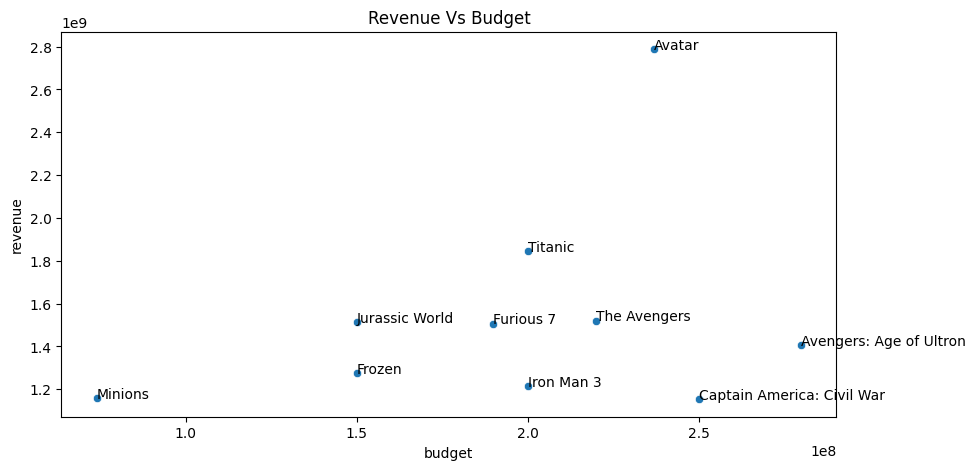

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax=fig.add_subplot(111)
sns.scatterplot(data=top_10, x="budget",y="revenue")

titles = list(top_10["title"])
popular = list(top_10["popularity"])
for i, text in enumerate(titles):
  ax.text(top_10['budget'].iloc[i],top_10["revenue"].iloc[i],text)


plt.title("Revenue Vs Budget")

From this graph we can see that Avatar is about twice as good as the average of the next 9.

In [ ]:
top_10.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
19995,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","US, GB",2009-12-10,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800
597,200000000,"Drama, Romance, Thriller",http://www.titanicmovie.com,"shipwreck, iceberg, ship, panic, titanic, ocea...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"Paramount Pictures, Twentieth Century Fox Film...",US,1997-11-18,1845034188,194.0,"English, Français, Deutsch, svenska, Italiano,...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562


Text(0.5, 1.0, 'Revenue Vs Budget')

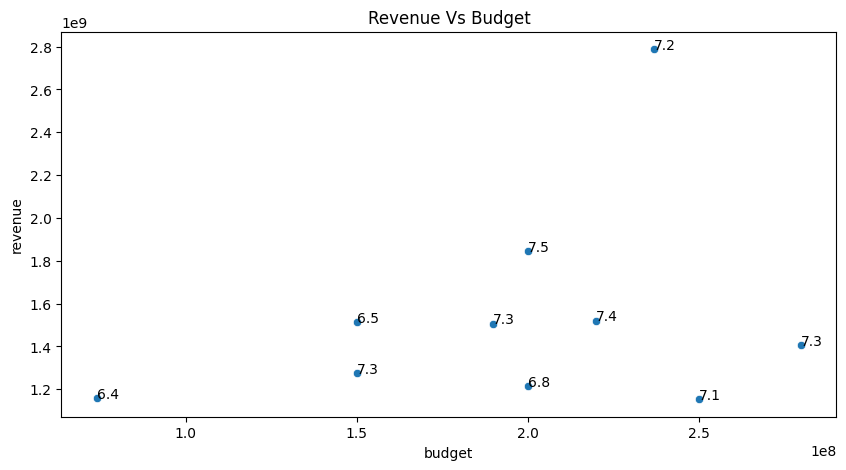

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax=fig.add_subplot(111)
sns.scatterplot(data=top_10, x="budget",y="revenue")

titles = list(top_10["title"])
score = list(top_10["vote_average"])
for i, text in enumerate(score):
  ax.text(top_10['budget'].iloc[i],top_10["revenue"].iloc[i],text)


plt.title("Revenue Vs Budget")

However despite its monitary success, the average score that it recieved does not stand out at all from the most successfull films.

This graph as a whole shows that the bigger the budget doesnt necessarily mean the better the product, with the highest rating over the top 10 grossing movies being 7.5. And Avatar having a respectable but nothing extraordinary 7.2.

# Film 2

For the next film I want to find one with a low budget but a high revenue.

In [ ]:
df.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
19995,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","US, GB",2009-12-10,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800
285,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",US,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [ ]:
under100k = df[df["budget"]<0.1e6]

In [ ]:
under100k.sort_values("revenue",ascending=False,inplace=True)

<ipython-input-483-016653843918>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under100k.sort_values("revenue",ascending=False,inplace=True)


In [ ]:
under100k.head(1)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
11199,0,"Action, Adventure, Comedy",http://video.movies.go.com/wildhogs/,"midlife crisis, road trip, politically incorre...",en,Wild Hogs,"Restless and ready for adventure, four suburba...",31.719463,"Wild Hogs Productions, Touchstone Pictures",US,2007-03-02,253625427,100.0,English,Released,A lot can happen on the road to nowhere.,Wild Hogs,5.6,648


Therefore the next film is Wild Hogs:

In [ ]:
wildhogs=df[df["title"]=="Wild Hogs"]

In [ ]:
wildhogs

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
11199,0,"Action, Adventure, Comedy",http://video.movies.go.com/wildhogs/,"midlife crisis, road trip, politically incorre...",en,Wild Hogs,"Restless and ready for adventure, four suburba...",31.719463,"Wild Hogs Productions, Touchstone Pictures",US,2007-03-02,253625427,100.0,English,Released,A lot can happen on the road to nowhere.,Wild Hogs,5.6,648


However, despite the budget being 0 in this dataset, after researching the film online I found that it actually had a budget of $60M

https://www.the-numbers.com/movie/Wild-Hogs#tab=summary

Therefore I will use my cleaned data set to refind a film.

In [ ]:
under100k = rev_bud[rev_bud["budget"]<0.1e6]

In [ ]:
under100k.sort_values("revenue",ascending=False,inplace=True)

<ipython-input-488-016653843918>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under100k.sort_values("revenue",ascending=False,inplace=True)


In [ ]:
under100k.head(1)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
2667,60000,"Horror, Mystery",http://www.blairwitch.com/,"witch, voodoo, legend, sorcery, maryland, fore...",en,The Blair Witch Project,In October of 1994 three student filmmakers di...,41.690578,"Artisan Entertainment, Haxan Films",US,1999-07-14,248000000,81.0,English,Released,The scariest movie of all time is a true story.,The Blair Witch Project,6.3,1055


The new title is The Blair Witch Project

In [ ]:
bwp = df[df["title"]=="The Blair Witch Project"]

In [ ]:
bwp

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
2667,60000,"Horror, Mystery",http://www.blairwitch.com/,"witch, voodoo, legend, sorcery, maryland, fore...",en,The Blair Witch Project,In October of 1994 three student filmmakers di...,41.690578,"Artisan Entertainment, Haxan Films",US,1999-07-14,248000000,81.0,English,Released,The scariest movie of all time is a true story.,The Blair Witch Project,6.3,1055


This is a film with a relatively low budget of \$60,000. However it was able to generate a massive \$248,000,000.

It was able to do this despite being a horror movie which was seen above to be one of the lesser grossing genres.

In [ ]:
top_10_horror = df[df["genres"].str.contains("Horror")]

In [ ]:
top_10_horror.sort_values("revenue",ascending=False, inplace=True)

<ipython-input-493-93ce0218e827>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_horror.sort_values("revenue",ascending=False, inplace=True)


In [ ]:
top_10_horror = top_10_horror.head(10)

Text(0.5, 1.0, 'Revenue Vs Budget')

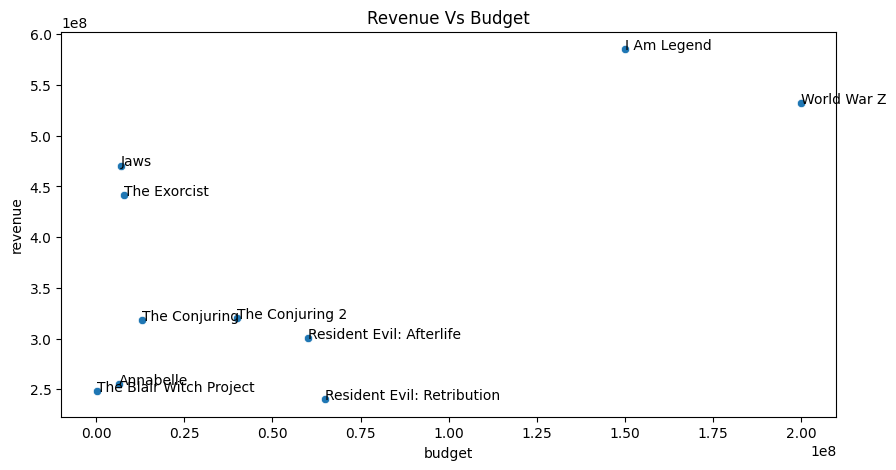

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax=fig.add_subplot(111)
sns.scatterplot(data=top_10_horror, x="budget",y="revenue")

titles = list(top_10_horror["title"])
popular = list(top_10_horror["popularity"])
for i, text in enumerate(titles):
  ax.text(top_10_horror['budget'].iloc[i],top_10_horror["revenue"].iloc[i],text)


plt.title("Revenue Vs Budget")

We can see from the graph despite the proportions on the axis being so massive that the Blair Witch Project is able to keep up with the big budget horror movies despite only costing \$60000.

In [ ]:
rev_bud["profit"] = rev_bud["revenue"]-rev_bud["budget"]

In [ ]:
rev_bud["roi"] = rev_bud["revenue"]/rev_bud["budget"]

In [ ]:
profit = rev_bud.sort_values("profit",ascending=False)
roi = rev_bud.sort_values("roi",ascending=False)

In [ ]:
roi.head(5)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit,roi
id,,,,,,,,,,,,,,,,,,,,,
3082,1,"Drama, Comedy",NaN,"factory, ambulance, invention, tramp, great de...",en,Modern Times,The Tramp struggles to live in modern industri...,28.276480,"United Artists, Charles Chaplin Productions",US,...,8500000,87.0,English,Released,He stands alone as the greatest entertainer of...,Modern Times,8.1,856,8499999,8.500000e+06
78383,10,"Horror, Thriller",NaN,"nurse, sexual murder, revenge, lesbian relatio...",en,Nurse 3-D,"Abby Russell, a beautiful, dedicated nurse wit...",10.013629,"Lions Gate, Lions Gate Entertainments",US,...,10000000,99.0,English,Released,Your pain is her pleasure.,Nurse 3-D,4.9,119,9999990,1.000000e+06
23827,15000,"Horror, Mystery",http://www.paranormalactivity-movie.com/,"haunting, psychic, entity, demonic possession,...",en,Paranormal Activity,"After a young, middle class couple moves into ...",47.456823,"Blumhouse Productions, Solana Films",US,...,193355800,86.0,English,Released,What Happens When You Sleep?,Paranormal Activity,5.9,1316,193340800,1.289039e+04
1435,218,"Documentary, Drama",NaN,"schizophrenia, gay, usa, rape, texas, loss of ...",en,Tarnation,Filmmaker Jonathan Caouette's documentary on g...,1.063439,,US,...,1162014,91.0,English,Released,NaN,Tarnation,7.5,22,1161796,5.330339e+03
2667,60000,"Horror, Mystery",http://www.blairwitch.com/,"witch, voodoo, legend, sorcery, maryland, fore...",en,The Blair Witch Project,In October of 1994 three student filmmakers di...,41.690578,"Artisan Entertainment, Haxan Films",US,...,248000000,81.0,English,Released,The scariest movie of all time is a true story.,The Blair Witch Project,6.3,1055,247940000,4.133333e+03


This lead me to investigate the ROI of the films which was calulated as revenue over budget. Here we can see that the Blair Witch Project comes in at #5 for all films (which havent been sorted out due to budget/ revenue data)

The other noticable thing found from this data is that Horror movies make up 3 of the 5 highest ROI films, suggesting that they can be created with low budgets whilst still attracting large revenues.

However a fault was found in this data. As seen in the top 5, we have budget values ranging from 1,10, 60000. After looking up the budget of Nurse-3D online https://www.imdb.com/title/tt1913166/ it has an estimated budget of 10MIllion. This shows that the budget data in this dataset has been entered inconsistantly. With some of the units being in the Millions of dollors and others being in dollors.